# Introduction

We know that exchange traded funds (ETFs) based on indices like S&P500 have high return rate in the last few years (before 2024). However such performances of ETFs are coupled with uncertainty and risks. On the other hands there are other assets the have lower risks; for paying off a high-interest rate loan can be seen as an investment with a fixed interest rate into the future with zero risk. 

In order to compare these two strategies, we will formulate performance of ETFs such that its risk is close to zero. We will take S&P500 index for this analysis. 

# Definitions
Let us define the price of an asset (e.g., our ETF) at $i$-th year by $X_i$ for $i=0,\dots, N$. Here $N$ is the maximum number of years that we hold into the share. Let us denote the yearly return of this asset by $\{R_i\}_{i=1}^{N}$ and defined by
$$
R_i = \frac{X_i - X_{i-1}}{X_{i-1}} \geq -1, \quad \forall i = 1, \dots, N.
$$
# Modelling
The average return rate after $N$ years is
$$
\mathcal{R} := \frac1N\frac{X_N - X_0}{X_0} = \frac1N \prod_{i=1}^{N} (1+R_i).
$$
A first order approximation of $\mathcal{R}$ is (see Appendix for details)
$$
\mathcal{R} = \frac1N \sum_{i=1}^{N} R_i + O(R_i^2),
$$
and it is more convinient to work with the *average of anual 
return rate* (first order approximation), i.e., $\bar{R}_N = \frac1N \sum_{i=1}^{N} R_i$, for the analysis. 

We assume that each random variable $\{R_i\}_{i=1}^{N}$ is i.i.d. and is distributed according to a PDF denoted by $R$. We will use the PDF of the anual return of S&P500 as $R$.

# Problem Statement
Find the minimum positive average return rate (denoted by $r$) such that its probability of occurance is at least $\tau$, 
i.e., given $0<\tau<1$ and $N \in \mathbb{N}$ find $r>0$ such that
$$
\tau < \mathbb{P}(r < \bar{R}_N).
$$
If we choose $\tau \approx 1$ and there exists a positive $r$ such that the above inequality is satisfied then we can claim that the asset has return rate at least $r$ with zero risk. Note that $\mathbb{P}(r < \bar{R}_N) = 1 - \text{CDF}_{\bar{R}}(r)$ and therefore the above condition reduces to: Given $0<\tau<1$ and $N \in \mathbb{N}$ find $r>0$ such that
$$
\text{CDF}_{\bar{R}}(r) < 1 - \tau.
$$
## Distribution of $\bar{R}_N$
Since $\bar{R}_N$ is a sample mean estimator we can obtain its CDF and PDF if we impose some assumptions on $\{R_i\}_{i=1}^{N}$. Since $\{R_i\}_{i=1}^{N}$ are i.i.d., we can just impose condition on $R$.
### Normal assumption of $R$
If $R$ is normally distributed with mean $\mu$ and standard deviation $\sigma^2$ then $\bar{R}_N \sim N(\mu, \frac{\sigma^2}{N})$.

# Imports

In [72]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Load data

In [13]:
df_return = (
    pd.read_csv("sp500_return.csv", header=None, names=["year", "annual_return_rate"])
    .set_index("year")
)

# Analysis

array([[<Axes: title={'center': 'annual_return_rate'}>]], dtype=object)

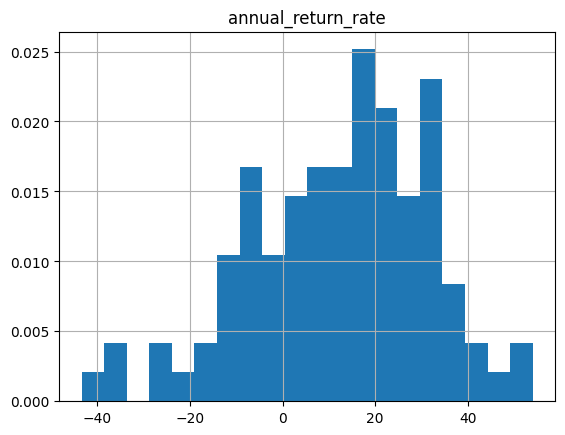

In [19]:
df_return.hist(bins=20, density=True)

In [32]:
mean, std = df_return.agg(["mean", "std"])["annual_return_rate"].tolist()

In [36]:
mean, std

(12.159489795918367, 19.723112998077823)

In [39]:
def risk_adjusted_norm(tau, n, mu, sigma):
    scale = sigma / np.sqrt(n)
    return norm.ppf(1-tau, loc=mu, scale=scale)

In [84]:
Tau = 0.99 # Probability
N_min = 5 # Min Years holding to asset
N_max = 40 # Max Years holding to asset

In [85]:
df_risk_adj_return = pd.DataFrame.from_dict(
    data={n: risk_adjusted_norm(Tau, n, mean, std) for n in range(N_min, N_max, 5)},
    orient="index",
    columns=["risk_adj_return"],
)

df_risk_adj_return.index.name = "N"

df_risk_adj_return

,risk_adj_return
N,
5,-8.359932
10,-2.349933
15,0.312596
20,1.899779
25,2.982925
30,3.782471
35,4.403877


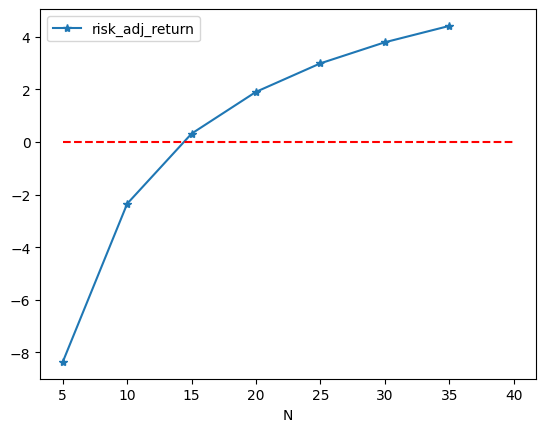

In [91]:
fig, ax = plt.subplots()
df_risk_adj_return.plot(style="-*", ax=ax)
ax.hlines(y=0, xmin=N_min, xmax=N_max, color="red", linestyles="--")